In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('letterCG.bin',sep=' ')

In [21]:
df.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [22]:
df.dropna()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,C,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9
1505,C,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9
1506,G,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9
1507,C,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6


<b>1.The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.data” and set all the numerical attributes as features.Split the data in to train and test sets.</b>

In [25]:
x=df.iloc[:,1:17]
y=df.Class

In [26]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=0)

<b>2. Fit a sequence of AdaBoostClassifier with varying number of weak learners ranging from 1 to 16, keeping the max_depth as 1. Plot the accuracy on test set against the number of weak learners.Use decision tree classifier as the base classifier.</b>

In [48]:
kfold = KFold(n_splits=10,random_state=0)
adb_model_1=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=16,random_state=7,learning_rate=1)

C:\Users\Senjuti\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [49]:
#result = cross_val_score(adb_model,x,y,cv=kfold).mean()
#adb_model1=AdaBoostClassifier(n_estimators=16,random_state=7)
#print(result)

In [50]:
adb_model_1.fit(train_x,train_y)
y_predict = adb_model_1.predict(test_x)

In [58]:
print('Accuracy when max_depth as 1 :',metrics.accuracy_score(y_predict,test_y)*100)

Accuracy when max_depth as 1 : 93.70860927152319


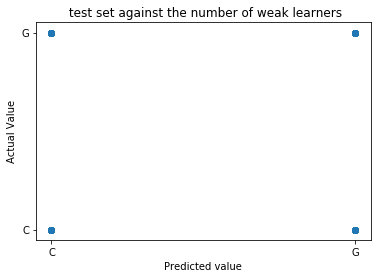

In [62]:
plt.scatter(y_predict,test_y)
plt.title(' test set against the number of weak learners')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()

<b>3.Repeat step2 with max_depth set as 2</b>

In [52]:
adb_model_1=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=16,random_state=7,learning_rate=2)

In [64]:
adb_model_1.fit(train_x,train_y)
y_predict = adb_model_1.predict(test_x)
print('Accuracy when max_depth as 2 :',metrics.accuracy_score(y_predict,test_y)*100)

Accuracy when max_depth as 2 : 95.03311258278146


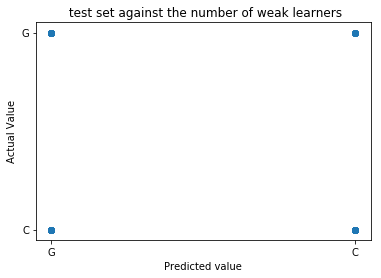

In [65]:
plt.scatter(y_predict,test_y)
plt.title(' test set against the number of weak learners')
plt.xlabel('Predicted value')
plt.ylabel('Actual Value')
plt.show()